In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks',
              rc={'axes.facecolor': (0, 0, 0, 0)})
sns.set_context('talk')

from matplotlib import rcParams, colors, cm
import matplotlib.patches as mpatches
rcParams['font.family'] = 'sans-serif'
rcParams['figure.dpi'] = 150

In [2]:
import os
import warnings
import itertools
import numpy as np
import pandas as pd
from scipy import stats
from pyfish import fish_plot, process_data
# local import
from utils import read_mi, enrichment
from utils import ml_metrics, get_rbd_mutated
from utils import AFFINITY, ESCAPE, MOI

In [3]:
INTERESTING = set(MOI).union(AFFINITY).union(ESCAPE)

In [4]:
print(INTERESTING)

{18, 403, 406, 417, 681, 439, 440, 446, 447, 449, 452, 455, 456, 477, 484, 489, 493, 494, 496, 498, 501, 505, 506}


In [5]:
df = []
d_mutated = {}
all_mutated = set()
for name in sorted(os.listdir('../out/update/time-filtered-subsets/')):
    try:
        df.append(read_mi(f'../out/update/time-filtered-subsets/{name}/mi_annotated.tsv.gz',
                          name,
                          date=True))
        mutated = get_rbd_mutated('../out/update/time-filtered-lineages/',
                                  names=[name,])
        d_mutated[name] = mutated.union(all_mutated)
        all_mutated = mutated.union(all_mutated)
    except FileNotFoundError:
        pass
df = pd.concat(df)

In [6]:
LAST_DATE = df['name'].sort_values().values[-1]

LAST_DATE

'2023-08'

In [7]:
df.groupby(['year', 'month'])['pos_source'].count()

year  month
2020  3        79586
      4        75912
      5        67722
      6        71006
      7        57336
      8        50200
      9        44790
      10       38936
      11       22166
      12       18520
2021  1        18588
      2        11238
      3         8580
      4         8426
      5         9292
      6         7392
      7         5938
      8         5216
      9         4906
      10        8374
      11        6498
      12        3538
2022  1         3004
      2         1654
      3         1204
      4          652
      5          516
      6          516
      7          488
      8          572
      9          622
      10         570
      11         682
      12         558
2023  1          578
      2          594
      3          730
      4          940
      5          568
      6          964
      7         1696
      8         1648
Name: pos_source, dtype: int64

In [8]:
count = df.groupby(['name', 'outlier'])['pos_source'].count().reset_index()

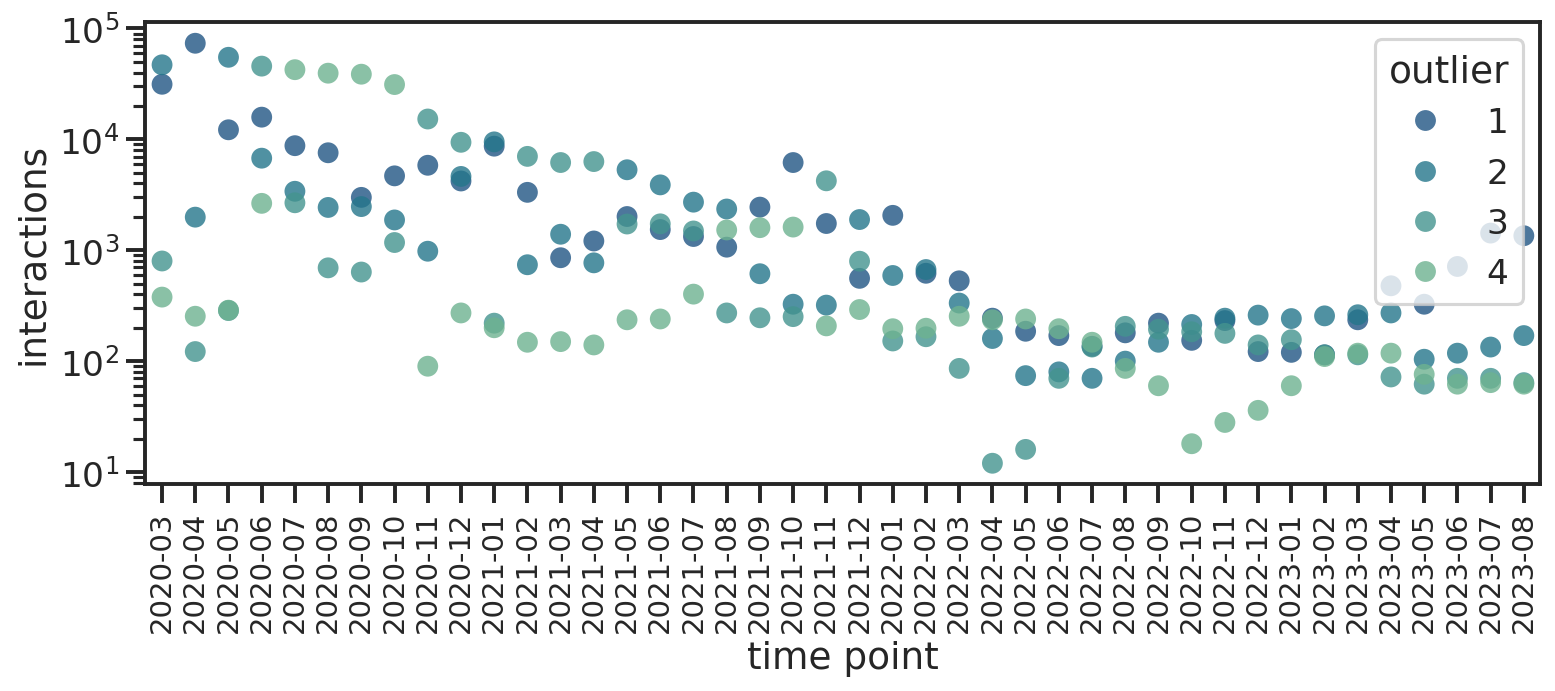

In [9]:
plt.figure(figsize=(12, 4))

sns.stripplot(data=count,
              y='pos_source',
              x='name',
              hue='outlier',
              size=10,
              jitter=0,
              alpha=0.8,
              palette=sns.color_palette('crest_r', 4))

plt.xticks(rotation=90,
           size=14)

plt.legend(facecolor='w',
           title='outlier')

plt.ylabel('interactions')
plt.xlabel('time point')

plt.yscale('log')

plt.savefig('update_1.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_1.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [10]:
dist = df.groupby(['name', 'outlier'])['distance'].mean().reset_index()

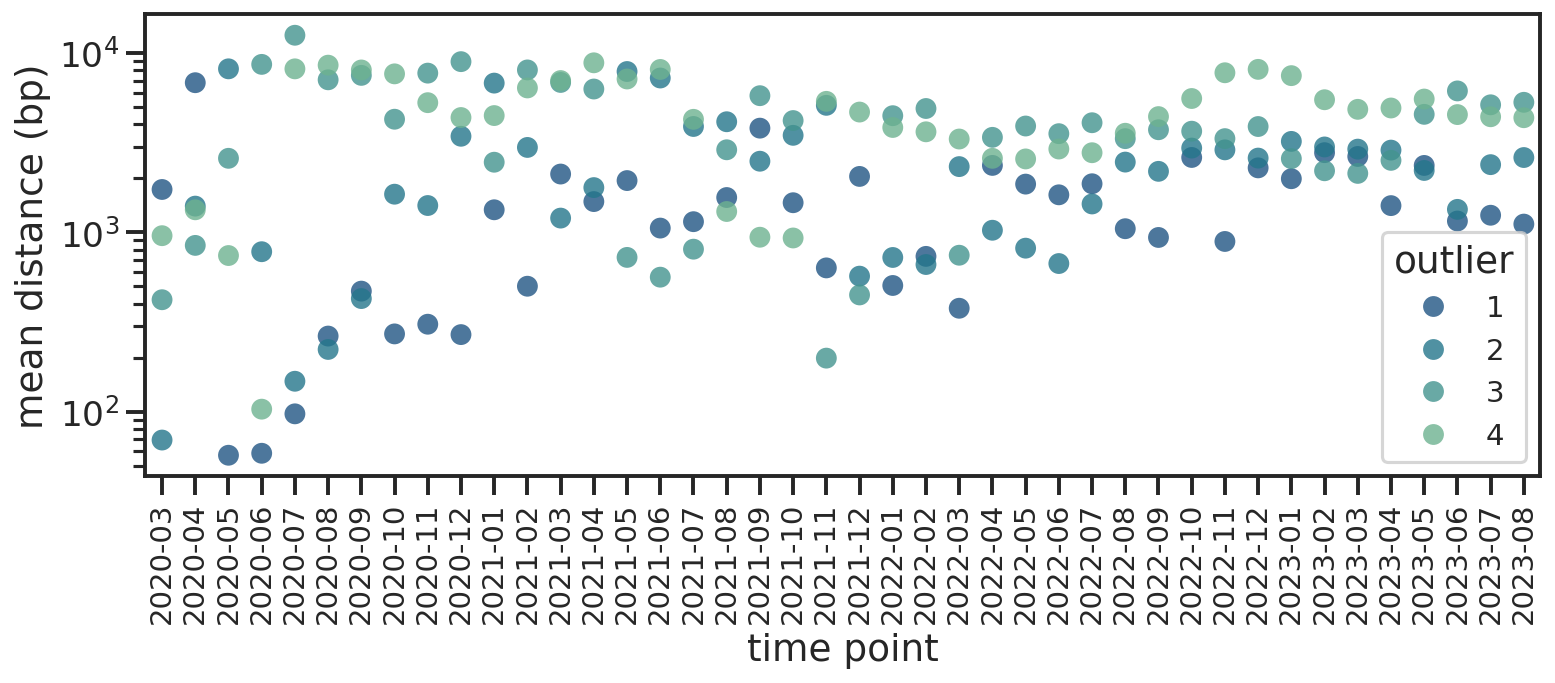

In [11]:
plt.figure(figsize=(12, 4))

sns.stripplot(data=dist,
              y='distance',
              x='name',
              hue='outlier',
              size=10,
              jitter=0,
              alpha=0.8,
              palette=sns.color_palette('crest_r', 4))

plt.xticks(rotation=90,
           size=14)

plt.legend(facecolor='w',
           title='outlier',
           fontsize=14)

plt.ylabel('mean distance (bp)')
plt.xlabel('time point')

plt.yscale('log')

plt.savefig('update_2.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_2.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [12]:
dist = df.groupby(['name', 'outlier'])['distance'].median().reset_index()

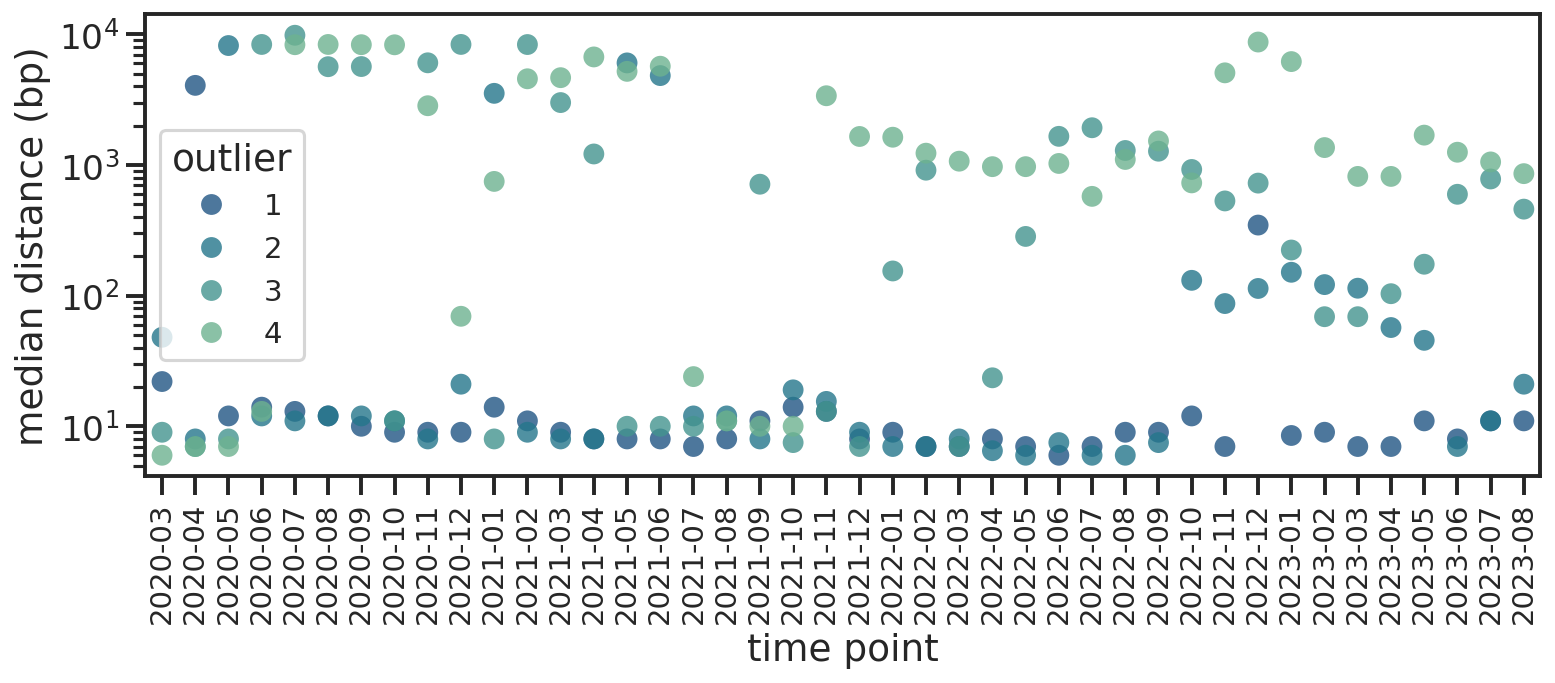

In [13]:
plt.figure(figsize=(12, 4))

sns.stripplot(data=dist,
              y='distance',
              x='name',
              hue='outlier',
              size=10,
              jitter=0,
              alpha=0.8,
              palette=sns.color_palette('crest_r', 4))

plt.xticks(rotation=90,
           size=14)

plt.legend(facecolor='w',
           title='outlier',
           fontsize=14)

plt.ylabel('median distance (bp)')
plt.xlabel('time point')

plt.yscale('log')

plt.savefig('update_3.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_3.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [14]:
s1 = df[(~df['name'].isin(['2020-02',
                           # '2020-03'
                          ])) &
        (df['gene_source'] == 'S') &
        (df['gene_target'] == 'S') &
        ((df['feature_codon_source'] == 501) &
         (df['feature_codon_target'] == 498))].copy()

s1 = s1.pivot_table(index=['feature_codon_source',
                          'feature_codon_target'],
                   columns='name',
                   values='outlier',
                   aggfunc=max).reindex(columns=sorted(df[~df['name'].isin(['2020-02',
                                                                            # '2020-03'
                                                                           ])]['name'].unique()))

/tmp/ipykernel_247093/3519535378.py:9: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  s1 = s1.pivot_table(index=['feature_codon_source',


In [15]:
s2 = df[(~df['name'].isin(['2020-02',
                           # '2020-03'
                          ])) &
        (df['gene_source'] == 'S') &
        (df['gene_target'] == 'S') &
        ((df['feature_codon_source'].isin(AFFINITY)) &
         (df['feature_codon_target'].isin(INTERESTING.difference(AFFINITY))))].copy()

s2 = s2.pivot_table(index=['feature_codon_source',
                          'feature_codon_target'],
                   columns='name',
                   values='outlier',
                   aggfunc=max).reindex(columns=sorted(df[~df['name'].isin(['2020-02',
                                                                            # '2020-03'
                                                                           ])]['name'].unique()))

/tmp/ipykernel_247093/2957869232.py:9: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  s2 = s2.pivot_table(index=['feature_codon_source',


In [16]:
s3 = df[(~df['name'].isin(['2020-02',
                           # '2020-03'
                          ])) &
        (df['gene_source'] == 'S') &
        (df['gene_target'] == 'S') &
        ((df['feature_codon_source'].isin(INTERESTING.difference(AFFINITY))) &
         (df['feature_codon_target'].isin(INTERESTING.difference(AFFINITY))))].copy()

s3 = s3.pivot_table(index=['feature_codon_source',
                          'feature_codon_target'],
                   columns='name',
                   values='outlier',
                   aggfunc=max).reindex(columns=sorted(df[~df['name'].isin(['2020-02',
                                                                            # '2020-03'
                                                                           ])]['name'].unique()))

/tmp/ipykernel_247093/4152375240.py:9: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  s3 = s3.pivot_table(index=['feature_codon_source',


In [17]:
s = pd.concat([s1, s2])

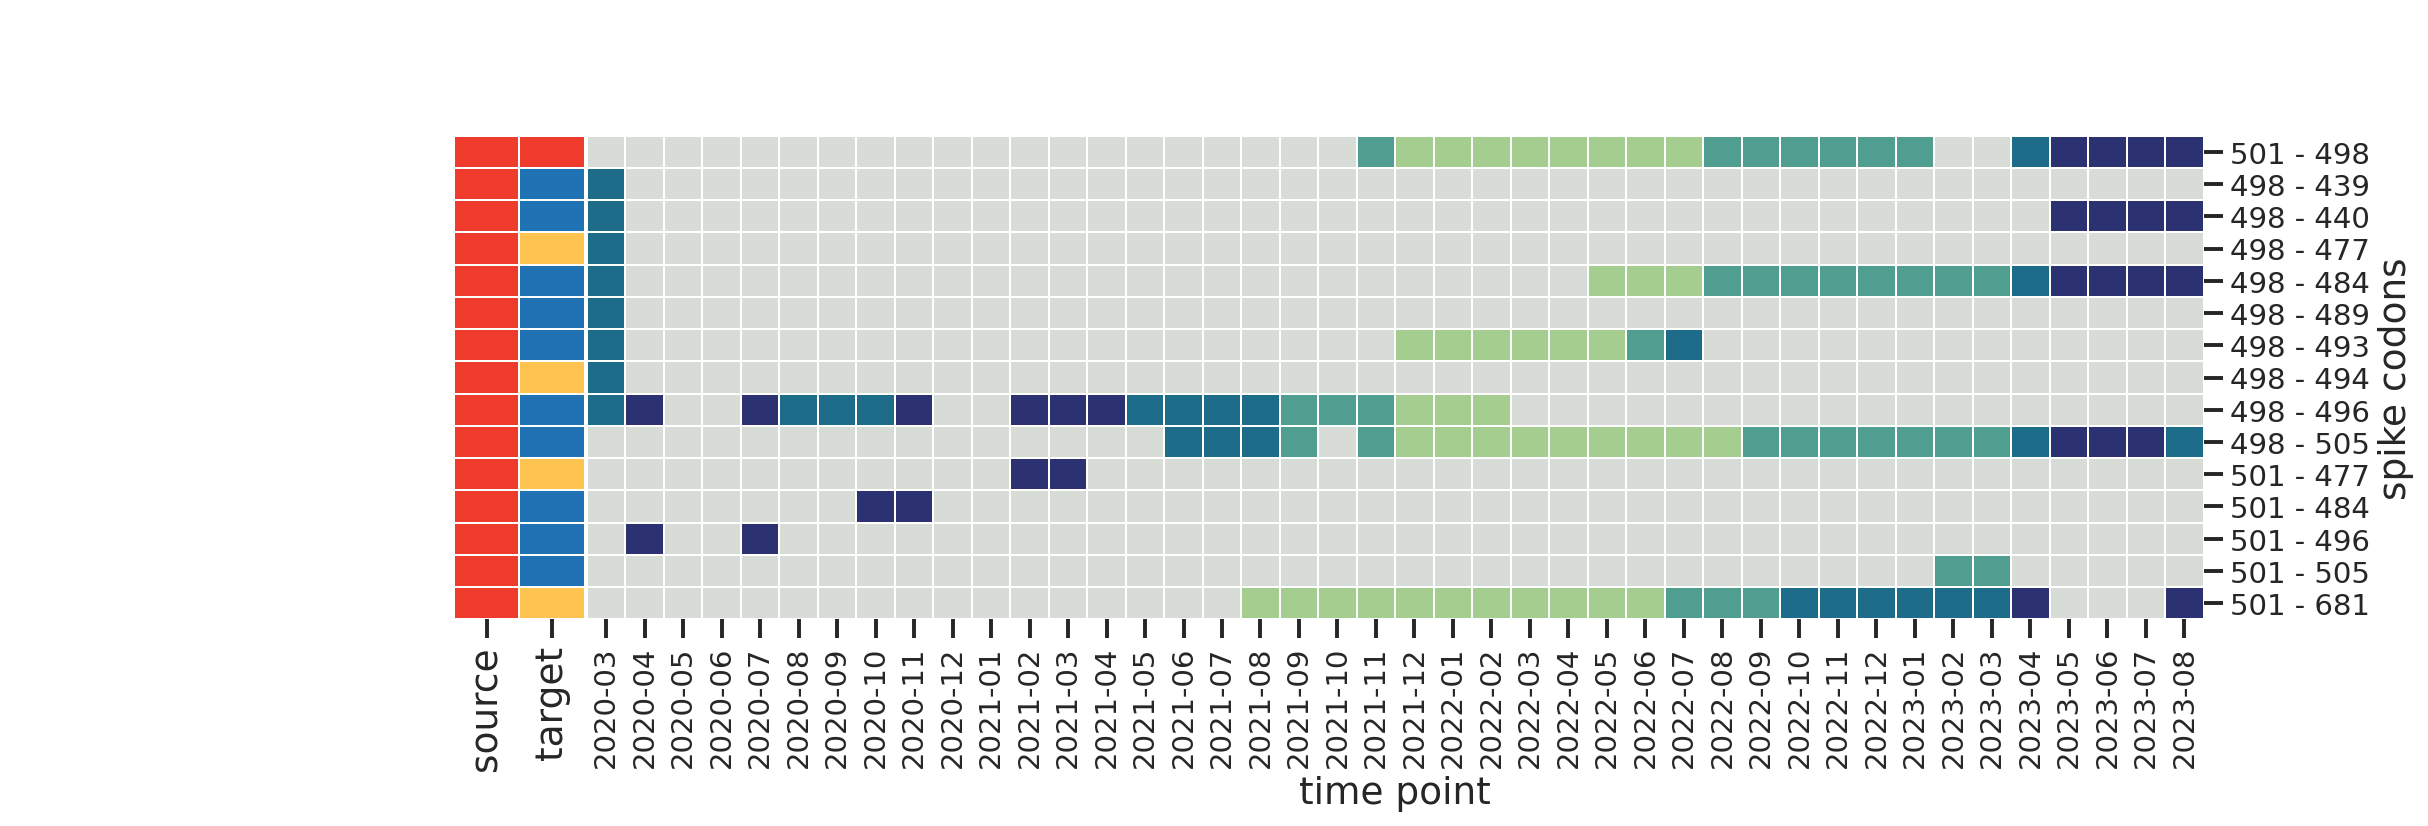

In [18]:
cmap = plt.get_cmap('crest_r').copy()
cmap.set_bad('xkcd:light grey')

colors1 = []
colors2 = []
for x, y in s.index:
    if x in AFFINITY:
        colors1.append('#ef3b2cff')
    elif x in ESCAPE:
        colors1.append('#2171b5ff')
    elif x in MOI:
        colors1.append('#fec44fff')
    else:
        colors1.append('xkcd:grey')

    if y in AFFINITY:
        colors2.append('#ef3b2cff')
    elif y in ESCAPE:
        colors2.append('#2171b5ff')
    elif y in MOI:
        colors2.append('#fec44fff')
    else:
        colors2.append('xkcd:grey')

cm = sns.clustermap(s, cmap=cmap,
                    row_cluster=False, col_cluster=False,
                    row_colors=pd.DataFrame([[a, b] for a, b in zip(colors1, colors2)],
                                            columns=['source', 'target'],
                                            index=s.index),
                    linewidths=0.005,
                    cbar_pos=None,
                    figsize=(17, 6),
                    vmin=1, vmax=4)

cm.ax_heatmap.set_xlabel('time point')
cm.ax_heatmap.set_ylabel('spike codons')

cm.ax_heatmap.set_xticks([x + 0.5 for x in range(s.shape[1])],
                         s.columns,
                         fontsize=14)
cm.ax_heatmap.set_yticks([x + 0.5 for x in range(s.shape[0])],
                         [f'{int(x)} - {int(y)}' for x, y in s.index],
                         fontsize=14)

cm.ax_row_colors.set_xticks([0.5, 1.5],
                            ['source', 'target'],
                            fontsize=18)

plt.savefig('update_4.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_4.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [19]:
s3 = df[(df['year'] > 2020) &
        # (~df['name'].isin([f'2021-{x:02d}'
        #                    for x in range(1, 11)])) &
        (df['gene_source'] == 'S') &
        (df['gene_target'] == 'S') &
        (df['feature_codon_source'].isin(INTERESTING))].copy()

s3 = s3.pivot_table(index=['feature_codon_source',
                          'feature_codon_target'],
                   columns='name',
                   values='outlier',
                   aggfunc=max).reindex(columns=sorted(df[(df['year'] > 2020) #&
        # (~df['name'].isin([f'2021-{x:02d}'
        #                    for x in range(1, 11)]))
                                                       ]['name'].unique()))

/tmp/ipykernel_247093/2047885515.py:8: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  s3 = s3.pivot_table(index=['feature_codon_source',


In [20]:
s = s3

s = s.sort_values(LAST_DATE, ascending=False)

s = s.loc[s[[LAST_DATE]].dropna().index]

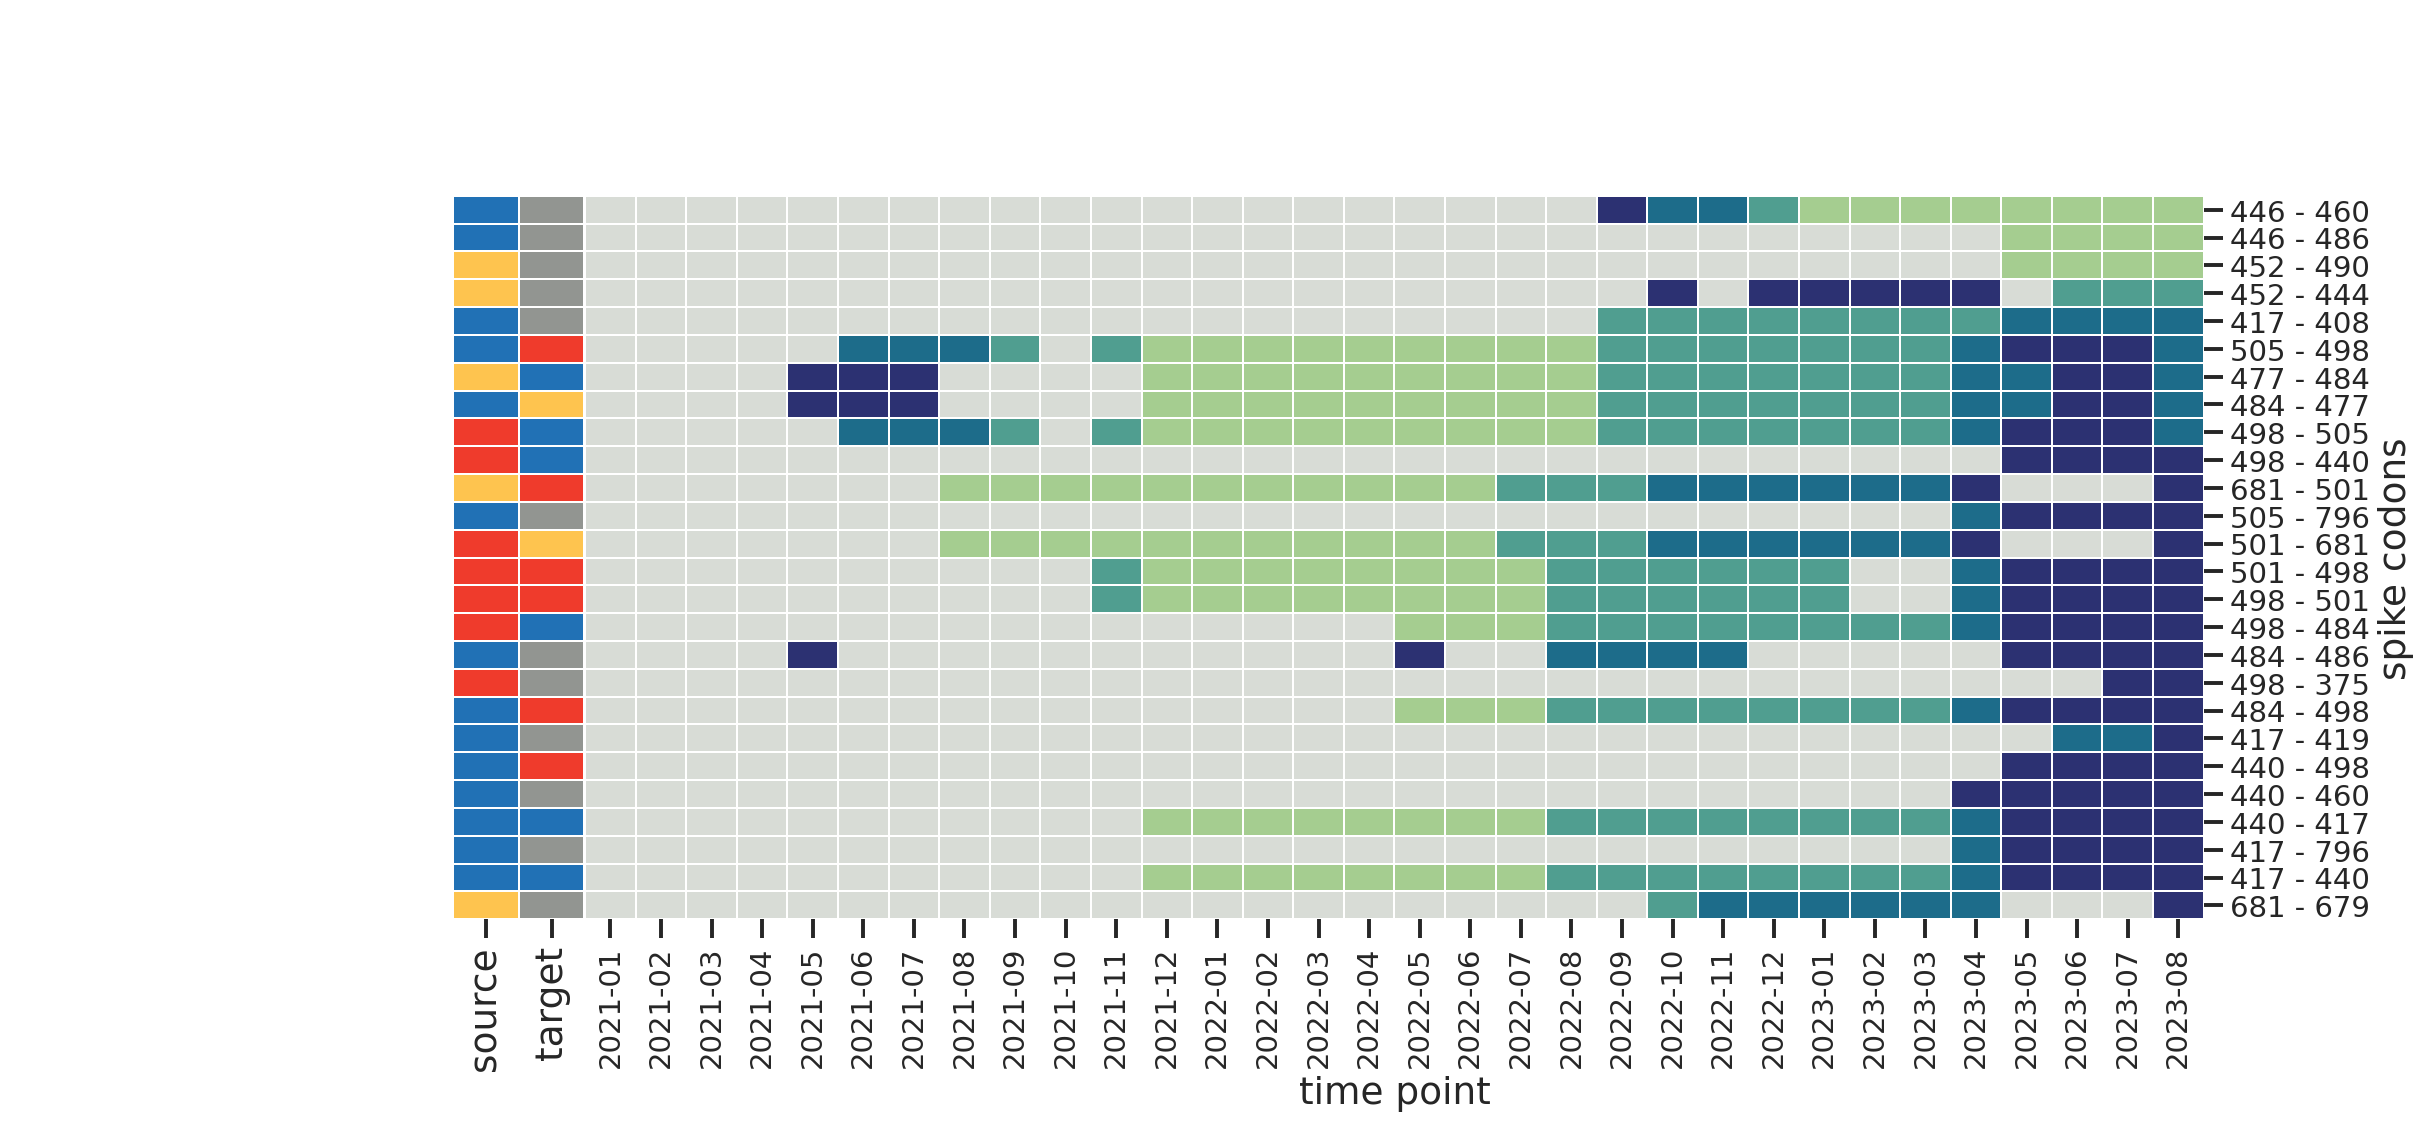

In [21]:
cmap = plt.get_cmap('crest_r').copy()
cmap.set_bad('xkcd:light grey')

colors1 = []
colors2 = []
for x, y in s.index:
    if x in AFFINITY:
        colors1.append('#ef3b2cff')
    elif x in ESCAPE:
        colors1.append('#2171b5ff')
    elif x in MOI:
        colors1.append('#fec44fff')
    else:
        colors1.append('xkcd:grey')

    if y in AFFINITY:
        colors2.append('#ef3b2cff')
    elif y in ESCAPE:
        colors2.append('#2171b5ff')
    elif y in MOI:
        colors2.append('#fec44fff')
    else:
        colors2.append('xkcd:grey')

cm = sns.clustermap(s, cmap=cmap,
                    row_cluster=False, col_cluster=False,
                    row_colors=pd.DataFrame([[a, b] for a, b in zip(colors1, colors2)],
                                            columns=['source', 'target'],
                                            index=s.index),
                    linewidths=0.005,
                    cbar_pos=None,
                    figsize=(17, 8),
                    vmin=1, vmax=4)

cm.ax_heatmap.set_xlabel('time point')
cm.ax_heatmap.set_ylabel('spike codons')

cm.ax_heatmap.set_xticks([x + 0.5 for x in range(s.shape[1])],
                         s.columns,
                         fontsize=14)
cm.ax_heatmap.set_yticks([x + 0.5 for x in range(s.shape[0])],
                         [f'{int(x)} - {int(y)}' for x, y in s.index],
                         fontsize=14)

cm.ax_row_colors.set_xticks([0.5, 1.5],
                            ['source', 'target'],
                            fontsize=18)

plt.savefig('update_5.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_5.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [22]:
s3 = df[(df['year'] > 2020) &
        # (~df['name'].isin([f'2021-{x:02d}'
        #                    for x in range(1, 11)])) &
        (df['gene_source'] == 'S') &
        (df['gene_target'] == 'S') &
        (df['outlier'] > 2)].copy()

s3 = s3.pivot_table(index=['feature_codon_source',
                          'feature_codon_target'],
                   columns='name',
                   values='outlier',
                   aggfunc=max).reindex(columns=sorted(df[(df['year'] > 2020) #&
        # (~df['name'].isin([f'2021-{x:02d}'
        #                    for x in range(1, 11)]))
                                                       ]['name'].unique()))

/tmp/ipykernel_247093/3437337660.py:8: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  s3 = s3.pivot_table(index=['feature_codon_source',


In [23]:
s = s3

s = s.sort_values(LAST_DATE, ascending=False)

s = s.loc[s[[LAST_DATE]].dropna().index]
idx = s.index

In [24]:
s3 = df[(df['year'] > 2020) &
        # (~df['name'].isin([f'2021-{x:02d}'
        #                    for x in range(1, 11)])) &
        (df['gene_source'] == 'S') &
        (df['gene_target'] == 'S')].copy()

s3 = s3.pivot_table(index=['feature_codon_source',
                          'feature_codon_target'],
                   columns='name',
                   values='outlier',
                   aggfunc=max).reindex(columns=sorted(df[(df['year'] > 2020) #&
        # (~df['name'].isin([f'2021-{x:02d}'
        #                    for x in range(1, 11)]))
                                                       ]['name'].unique()))

/tmp/ipykernel_247093/935157653.py:7: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  s3 = s3.pivot_table(index=['feature_codon_source',


In [25]:
s = s3

s = s.sort_values(LAST_DATE, ascending=False)

s = s.loc[idx]

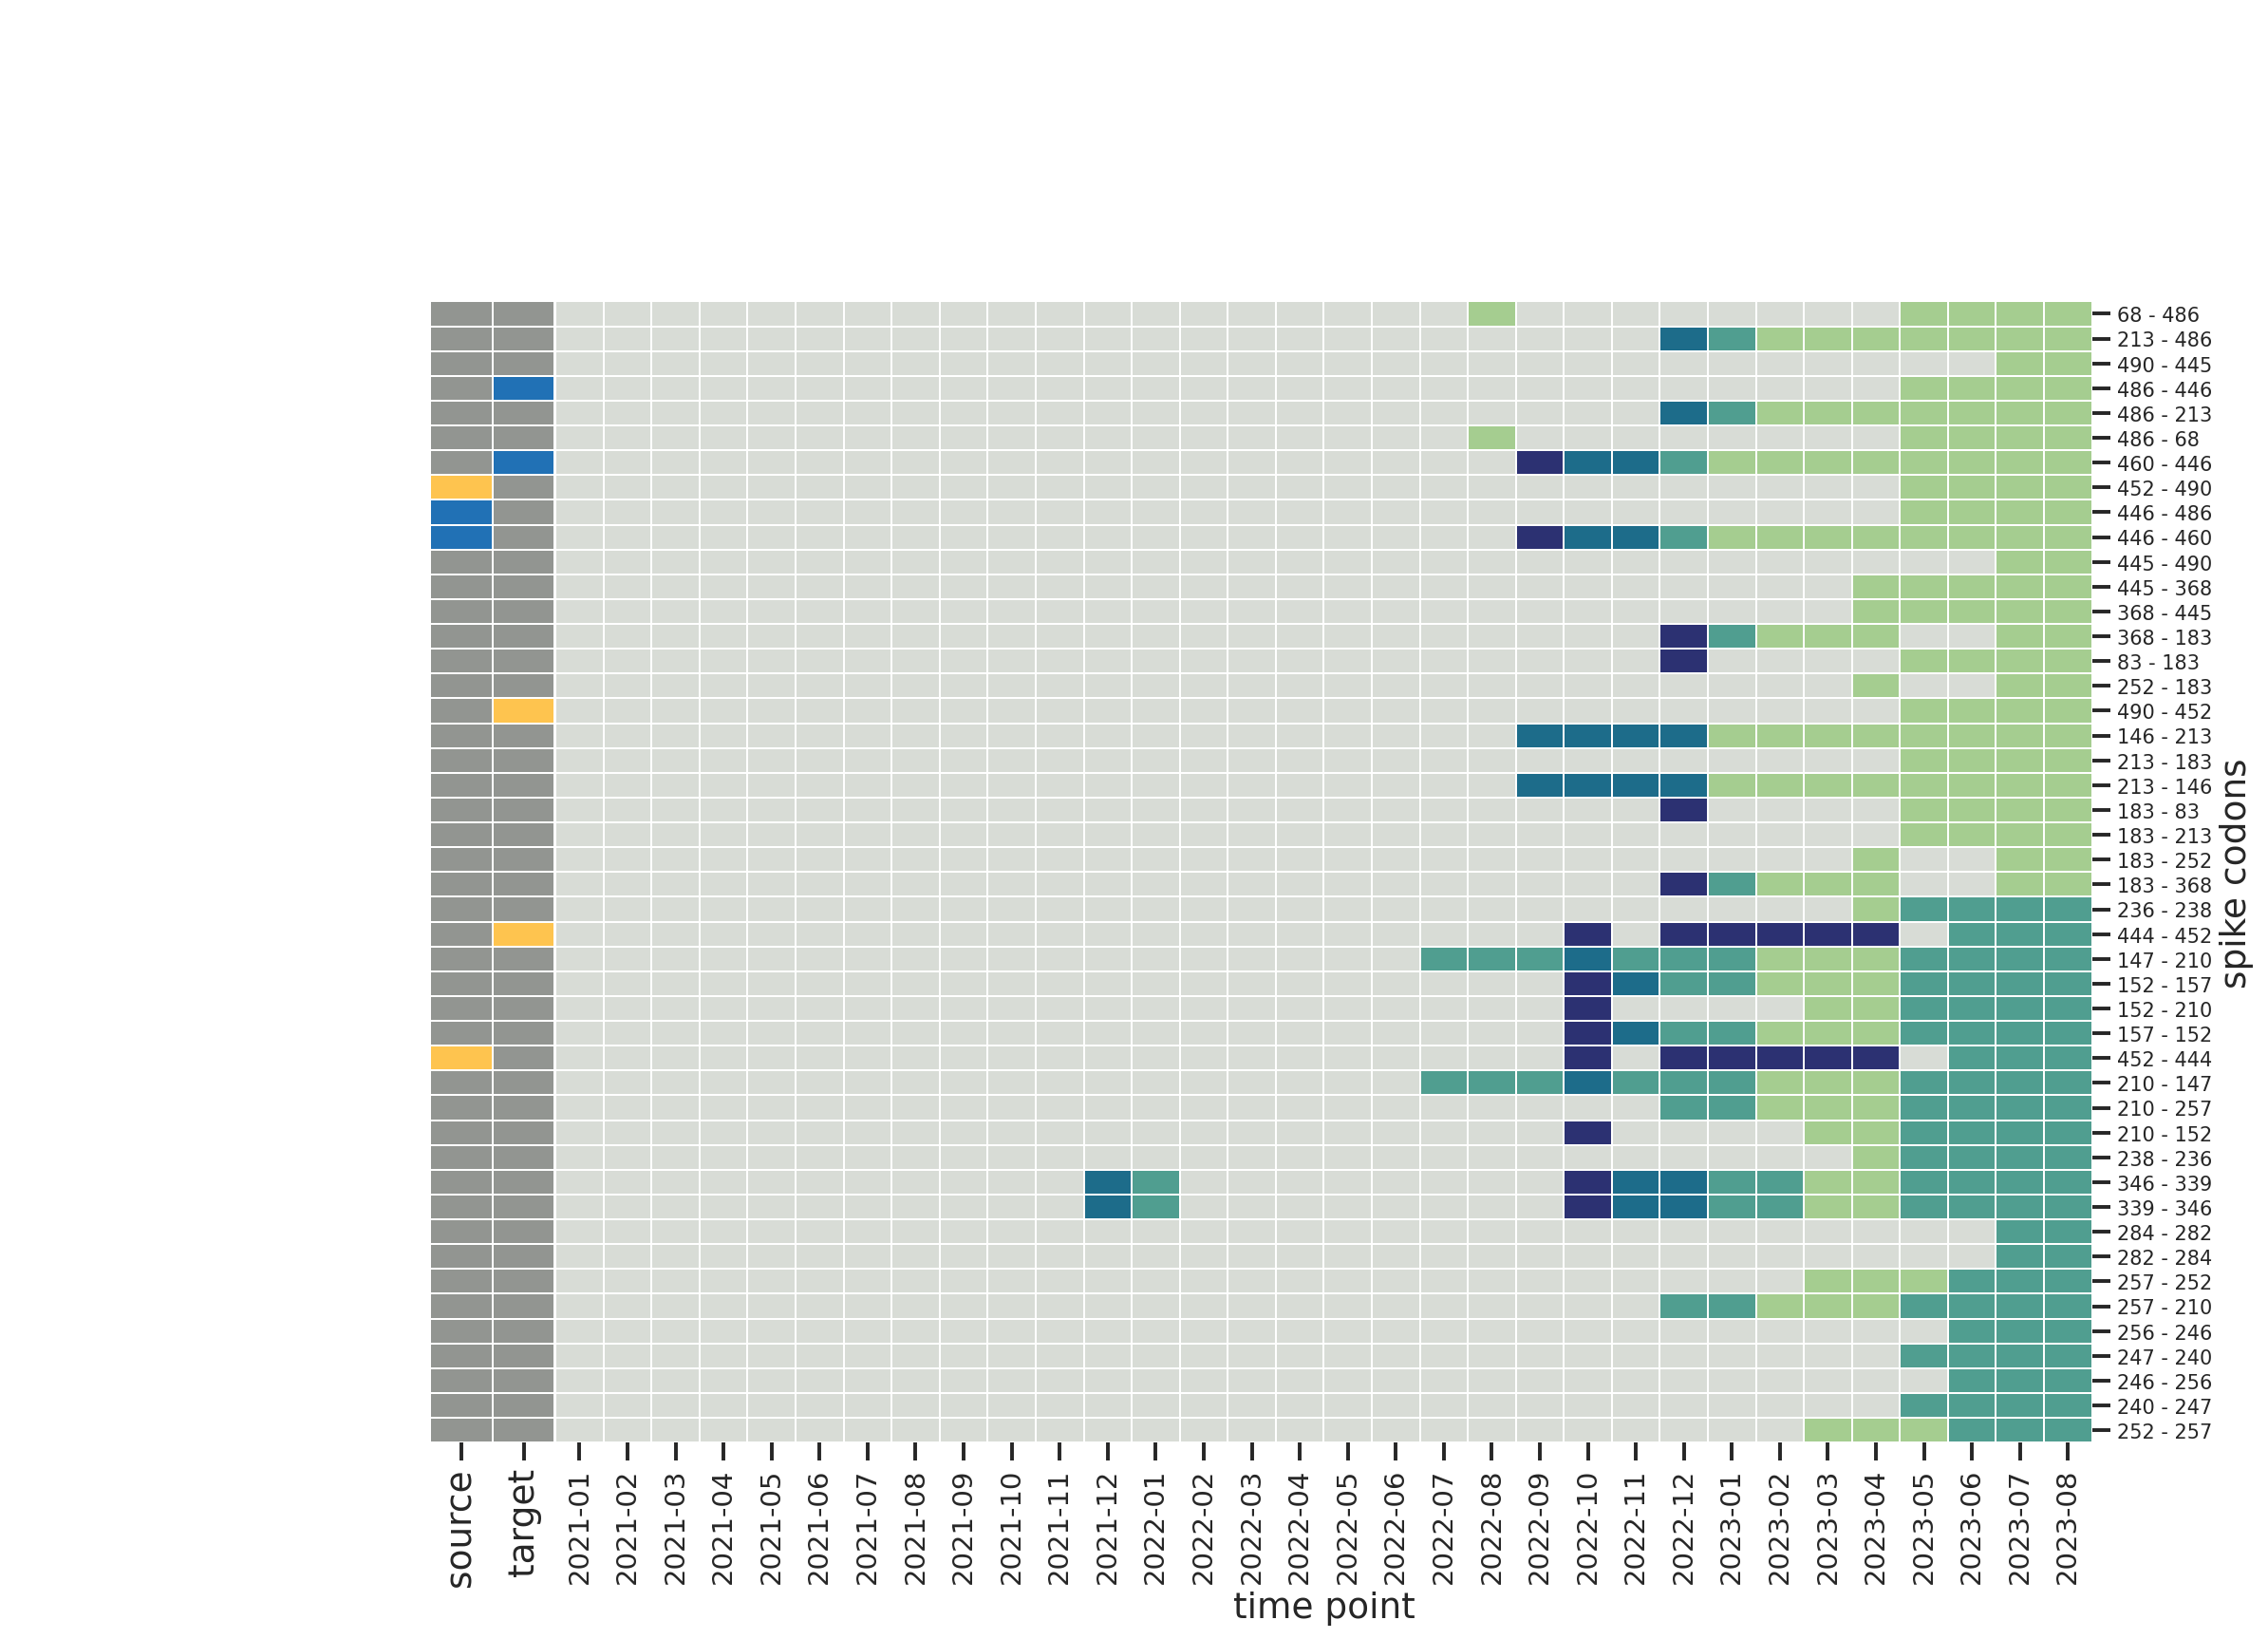

In [26]:
cmap = plt.get_cmap('crest_r').copy()
cmap.set_bad('xkcd:light grey')

colors1 = []
colors2 = []
for x, y in s.index:
    if x in AFFINITY:
        colors1.append('#ef3b2cff')
    elif x in ESCAPE:
        colors1.append('#2171b5ff')
    elif x in MOI:
        colors1.append('#fec44fff')
    else:
        colors1.append('xkcd:grey')

    if y in AFFINITY:
        colors2.append('#ef3b2cff')
    elif y in ESCAPE:
        colors2.append('#2171b5ff')
    elif y in MOI:
        colors2.append('#fec44fff')
    else:
        colors2.append('xkcd:grey')

cm = sns.clustermap(s, cmap=cmap,
                    row_cluster=False, col_cluster=False,
                    row_colors=pd.DataFrame([[a, b] for a, b in zip(colors1, colors2)],
                                            columns=['source', 'target'],
                                            index=s.index),
                    linewidths=0.005,
                    cbar_pos=None,
                    figsize=(17, 12),
                    vmin=1, vmax=4)

cm.ax_heatmap.set_xlabel('time point')
cm.ax_heatmap.set_ylabel('spike codons')

cm.ax_heatmap.set_xticks([x + 0.5 for x in range(s.shape[1])],
                         s.columns,
                         fontsize=14)
cm.ax_heatmap.set_yticks([x + 0.5 for x in range(s.shape[0])],
                         [f'{int(x)} - {int(y)}' for x, y in s.index],
                         fontsize=10)

cm.ax_row_colors.set_xticks([0.5, 1.5],
                            ['source', 'target'],
                            fontsize=18)

plt.savefig('update_6.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_6.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [27]:
follow_up_positions = {446, 452, 460, 486, 490, 498, 501}

In [28]:
df['pair'] = ['%d-%d' % (x, y) 
              if str(x) != 'nan'
              and str(y) != 'nan'
              else np.nan
              for x, y in df[['feature_codon_source',
                              'feature_codon_target']].values]

In [29]:
s3 = df[(~df['name'].isin(['2020-02',
                           # '2020-03'
                          ])) &
        (df['gene_source'] == 'S') &
        (df['gene_target'] == 'S') &
        ((df['feature_codon_source'].isin(follow_up_positions)) &
         (df['feature_codon_target'].isin(follow_up_positions)))].copy()

s3 = s3.pivot_table(index=['feature_codon_source',
                          'feature_codon_target'],
                   columns='name',
                   values='outlier',
                   aggfunc=max).reindex(columns=sorted(df[(df['year'] > 2020) #&
        # (~df['name'].isin([f'2021-{x:02d}'
        #                    for x in range(1, 11)]))
                                                       ]['name'].unique()))

/tmp/ipykernel_247093/2390098090.py:9: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  s3 = s3.pivot_table(index=['feature_codon_source',


In [30]:
s = s3

s = s.sort_values(LAST_DATE, ascending=False)

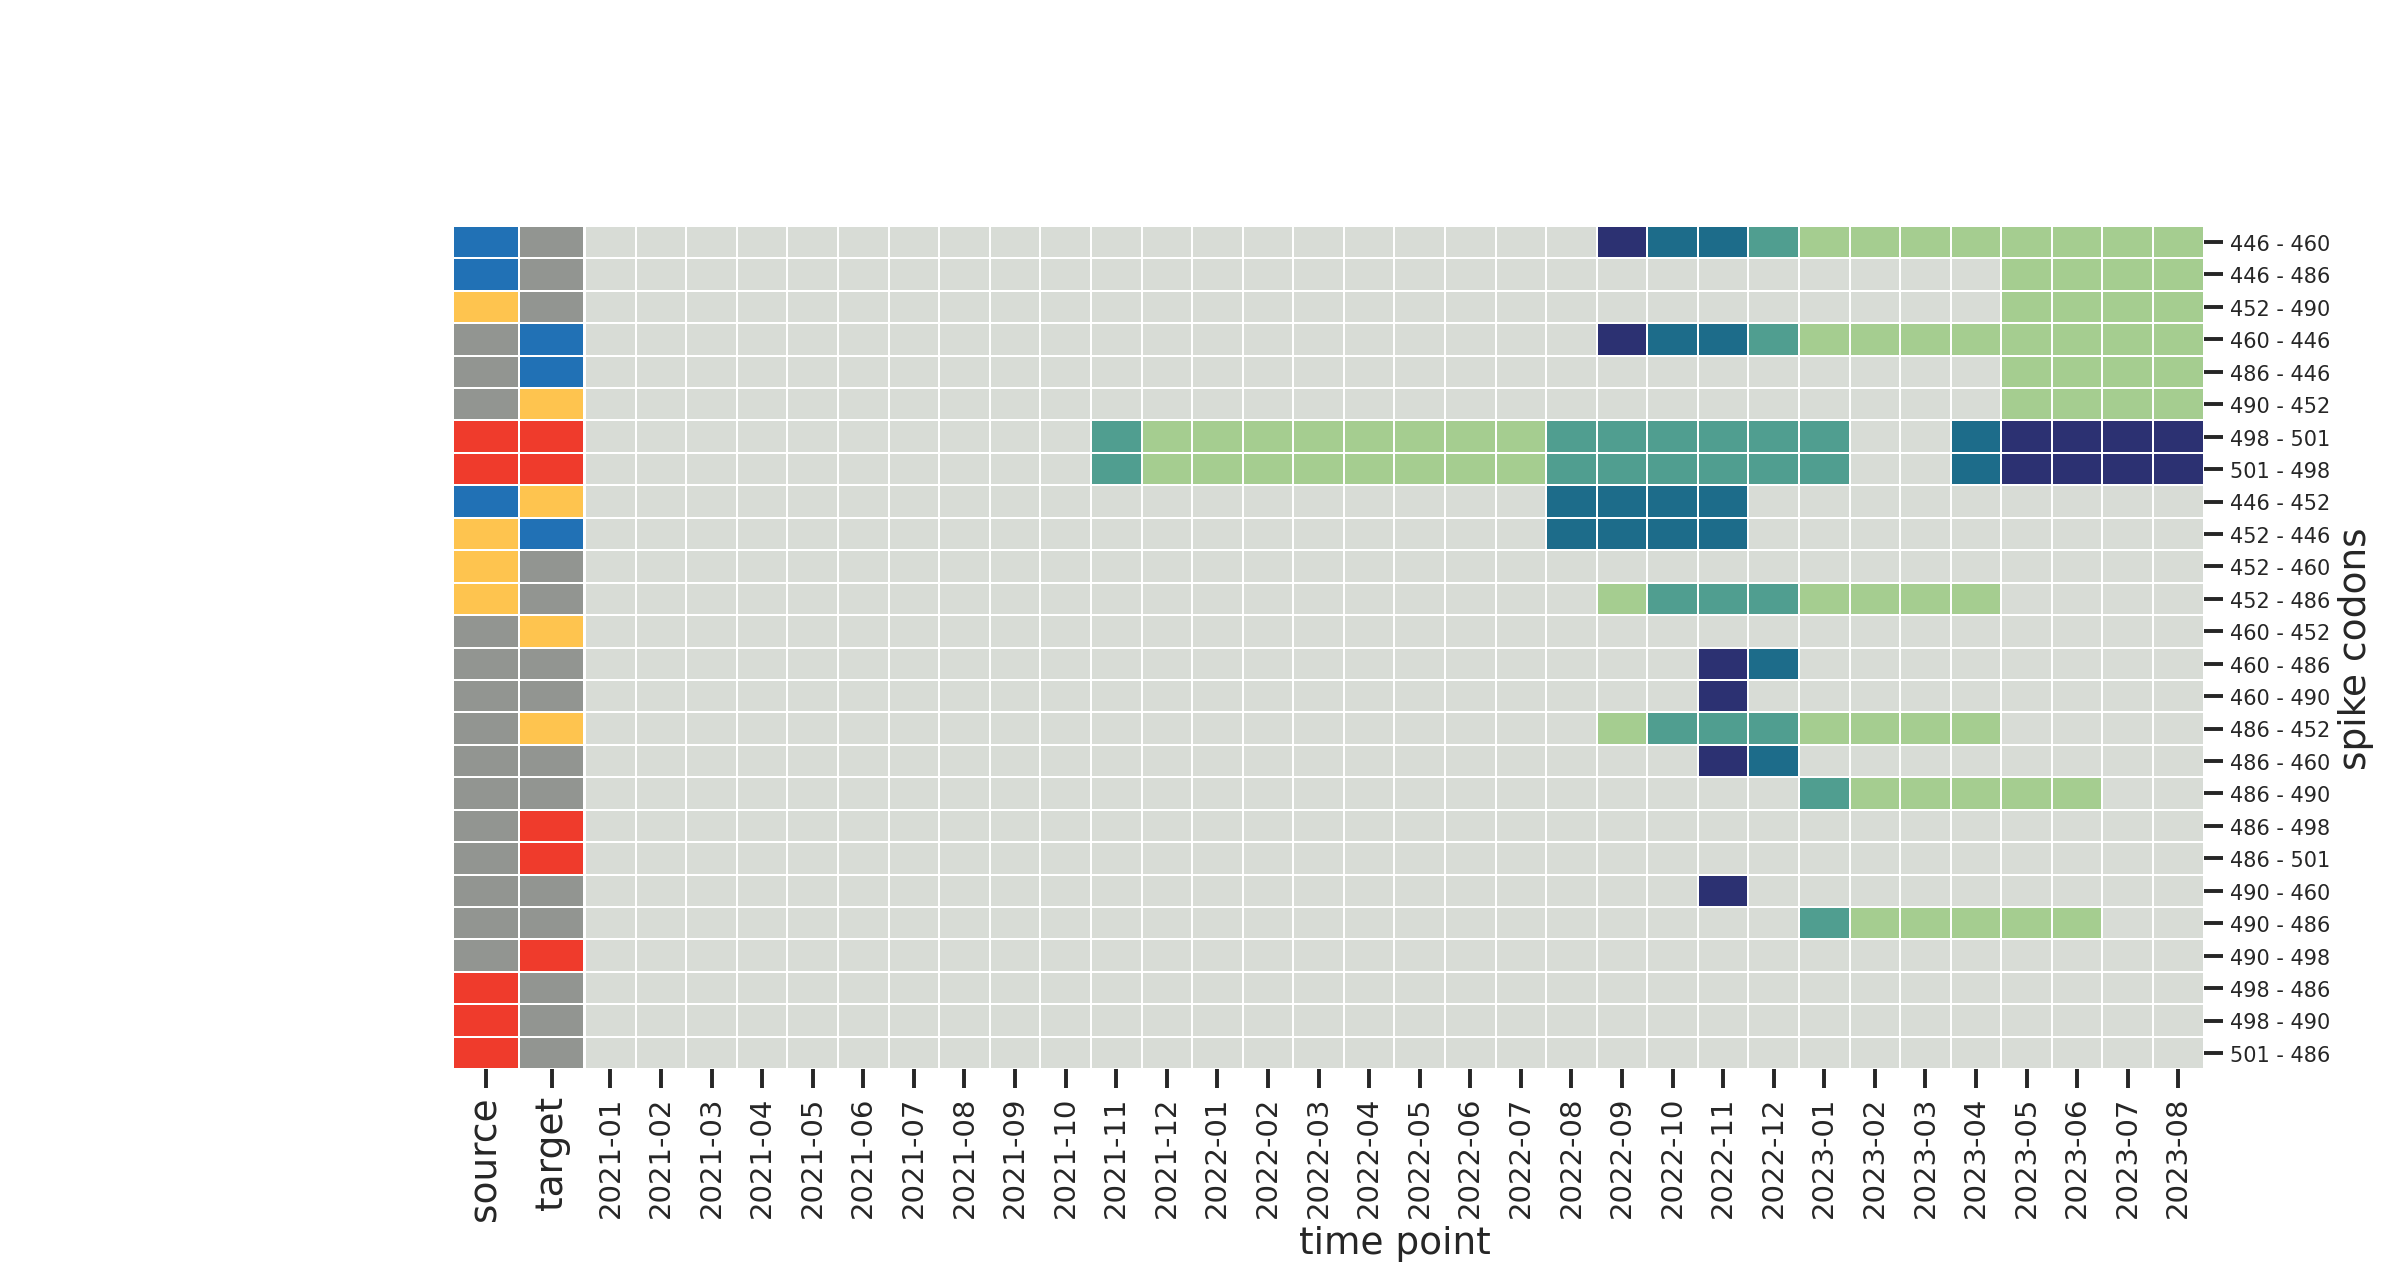

In [31]:
cmap = plt.get_cmap('crest_r').copy()
cmap.set_bad('xkcd:light grey')

colors1 = []
colors2 = []
for x, y in s.index:
    if x in AFFINITY:
        colors1.append('#ef3b2cff')
    elif x in ESCAPE:
        colors1.append('#2171b5ff')
    elif x in MOI:
        colors1.append('#fec44fff')
    else:
        colors1.append('xkcd:grey')

    if y in AFFINITY:
        colors2.append('#ef3b2cff')
    elif y in ESCAPE:
        colors2.append('#2171b5ff')
    elif y in MOI:
        colors2.append('#fec44fff')
    else:
        colors2.append('xkcd:grey')

cm = sns.clustermap(s, cmap=cmap,
                    row_cluster=False, col_cluster=False,
                    row_colors=pd.DataFrame([[a, b] for a, b in zip(colors1, colors2)],
                                            columns=['source', 'target'],
                                            index=s.index),
                    linewidths=0.005,
                    cbar_pos=None,
                    figsize=(17, 9),
                    vmin=1, vmax=4)

cm.ax_heatmap.set_xlabel('time point')
cm.ax_heatmap.set_ylabel('spike codons')

cm.ax_heatmap.set_xticks([x + 0.5 for x in range(s.shape[1])],
                         s.columns,
                         fontsize=14)
cm.ax_heatmap.set_yticks([x + 0.5 for x in range(s.shape[0])],
                         [f'{int(x)} - {int(y)}' for x, y in s.index],
                         fontsize=10)

cm.ax_row_colors.set_xticks([0.5, 1.5],
                            ['source', 'target'],
                            fontsize=18)

plt.savefig('update_6a.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_6a.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [32]:
follow_up_pairs = {'446-486', '446-460',
                   '452-490', '498-501'}

In [33]:
s3 = df[(~df['name'].isin(['2020-02',
                           # '2020-03'
                          ])) &
        (df['gene_source'] == 'S') &
        (df['gene_target'] == 'S') &
        (df['pair'].isin(follow_up_pairs))].copy()

s3 = s3.pivot_table(index=['feature_codon_source',
                          'feature_codon_target'],
                   columns='name',
                   values='outlier',
                   aggfunc=max).reindex(columns=sorted(df[(df['year'] > 2020) #&
        # (~df['name'].isin([f'2021-{x:02d}'
        #                    for x in range(1, 11)]))
                                                       ]['name'].unique()))

/tmp/ipykernel_247093/2446260876.py:8: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  s3 = s3.pivot_table(index=['feature_codon_source',


In [34]:
s = s3

s = s.sort_values(LAST_DATE, ascending=False)

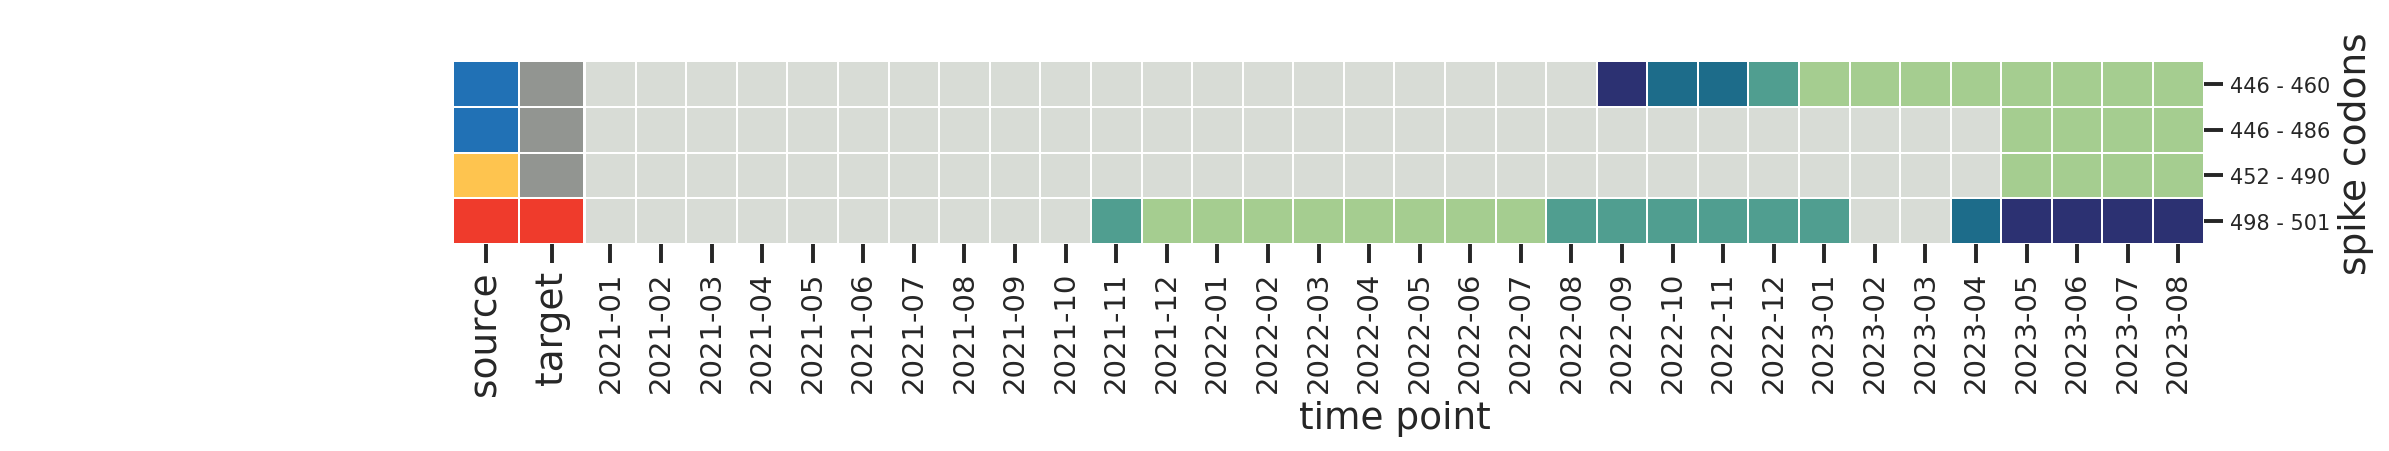

In [35]:
cmap = plt.get_cmap('crest_r').copy()
cmap.set_bad('xkcd:light grey')

colors1 = []
colors2 = []
for x, y in s.index:
    if x in AFFINITY:
        colors1.append('#ef3b2cff')
    elif x in ESCAPE:
        colors1.append('#2171b5ff')
    elif x in MOI:
        colors1.append('#fec44fff')
    else:
        colors1.append('xkcd:grey')

    if y in AFFINITY:
        colors2.append('#ef3b2cff')
    elif y in ESCAPE:
        colors2.append('#2171b5ff')
    elif y in MOI:
        colors2.append('#fec44fff')
    else:
        colors2.append('xkcd:grey')

cm = sns.clustermap(s, cmap=cmap,
                    row_cluster=False, col_cluster=False,
                    row_colors=pd.DataFrame([[a, b] for a, b in zip(colors1, colors2)],
                                            columns=['source', 'target'],
                                            index=s.index),
                    linewidths=0.005,
                    cbar_pos=None,
                    figsize=(17, 3.5),
                    vmin=1, vmax=4)

cm.ax_heatmap.set_xlabel('time point')
cm.ax_heatmap.set_ylabel('spike codons')

cm.ax_heatmap.set_xticks([x + 0.5 for x in range(s.shape[1])],
                         s.columns,
                         fontsize=14)
cm.ax_heatmap.set_yticks([x + 0.5 for x in range(s.shape[0])],
                         [f'{int(x)} - {int(y)}' for x, y in s.index],
                         fontsize=10)

cm.ax_row_colors.set_xticks([0.5, 1.5],
                            ['source', 'target'],
                            fontsize=18)

plt.savefig('update_6b.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_6b.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [36]:
res = []

d = {}
cw = {}
clades = {}

for f in os.listdir('../out/time-lineages/'):
    l = pd.read_csv(f'../out/time-lineages/{f}', sep='\t',
                    usecols=['seqName', 'clade', 'Nextclade_pango',
                             'partiallyAliased', 'clade_nextstrain',
                             'clade_who', 'clade_display'])
    date = f.split('.')[0]
    year = int(date.split('-')[0])
    month = int(date.split('-')[1])

    tmp = l.set_index('clade_display')['clade_who'].dropna().to_dict()
    for k, v in tmp.items():
        d[k] = v
        cw[v] = cw.get(v, set())
        cw[v].add(k)
        clades[v] = clades.get(v, [])
        if k not in clades[v]:
            clades[v].append(k)
    
    l = l.groupby('clade_display')['seqName'].count().reset_index()
    l = l.rename(columns={'seqName': 'count'})
    l['name'] = date
    l['year'] = year
    l['month'] = month

    res.append(l)
r = pd.concat(res)

In [28]:
rr = r.pivot_table(index='clade_display',
                   columns='name',
                   values='count')
rr = rr.fillna(0)
rr = rr / rr.sum()
rr.T.to_csv('clades.tsv', sep='\t')

In [29]:
r['clade_display'].unique()

array(['19B', '20A', '20B', '20C', '20D', '20E', '20G', '20H (Beta)',
       '20I (Alpha)', '20J (Gamma)', '21B (Kappa)', '21C (Epsilon)',
       '21D (Eta)', '21F (Iota)', '21J (Delta)', '21K (BA.1)',
       '21L (BA.2)', '21M (Omicron)', '22A (BA.4)', '22B (BA.5)',
       '22C (BA.2.12.1)', '22D (BA.2.75)', '22E (BQ.1)', 'recombinant',
       '21A (Delta)', '21I (Delta)', '21H (Mu)', '19A', '22F (XBB)',
       '23A (XBB.1.5)', '23B (XBB.1.16)', '20F', '21E (Theta)',
       '21G (Lambda)'], dtype=object)

In [30]:
clades

{'Alpha': ['20I (Alpha)'],
 'Iota': ['21F (Iota)'],
 'Gamma': ['20J (Gamma)'],
 'Epsilon': ['21C (Epsilon)'],
 'Delta': ['21J (Delta)', '21I (Delta)', '21A (Delta)'],
 'Beta': ['20H (Beta)'],
 'Kappa': ['21B (Kappa)'],
 'Eta': ['21D (Eta)'],
 'Omicron': ['21K (BA.1)',
  '21L (BA.2)',
  '21M (Omicron)',
  '22B (BA.5)',
  '22A (BA.4)',
  '22C (BA.2.12.1)',
  '22E (BQ.1)',
  '22D (BA.2.75)',
  '23A (XBB.1.5)',
  '22F (XBB)',
  '23B (XBB.1.16)'],
 'recombinant': ['recombinant'],
 'Mu': ['21H (Mu)'],
 'Lambda': ['21G (Lambda)'],
 'Theta': ['21E (Theta)']}

In [31]:
dl = {x: i+1 for i, x in enumerate(r['clade_display'].unique())}

In [32]:
dt = {x: i for i, x in enumerate(sorted(r['name'].unique()))}

In [33]:
dw = {x: i+1 for i, x in enumerate(d)}

In [34]:
res = []
for clade in r['clade_display'].unique():
    t = r[r['clade_display'] == clade].sort_values('name')
    for name, count in t[['name', 'count']].values:
        res.append([dl[clade], dt[name], count, d.get(clade, np.nan), clade])
df1 = pd.DataFrame(res,
                   columns=['Id', 'Step', 'Pop', 'VOC', 'clade'])

In [35]:
cw = {k: len(v) for k, v in cw.items()}

In [36]:
cw

{'Alpha': 1,
 'Iota': 1,
 'Gamma': 1,
 'Epsilon': 1,
 'Delta': 3,
 'Beta': 1,
 'Kappa': 1,
 'Eta': 1,
 'Omicron': 15,
 'recombinant': 1,
 'Mu': 1,
 'Lambda': 1,
 'Theta': 1}

In [37]:
voc = {'Alpha': 'xkcd:pale red',
       'Beta': 'xkcd:sea blue',
       'Delta': {x: c for c, x in zip(
           sns.color_palette('Purples', len(clades['Delta'])+2)[2:],
           sorted(clades['Delta']))},
       'Epsilon': 'xkcd:grey',
       'Eta': 'xkcd:grey',
       'Gamma': 'xkcd:grey',
       'Iota': 'xkcd:grey',
       'Kappa': 'xkcd:grey',
       'Lambda': 'xkcd:grey',
       'Mu': 'xkcd:grey',
       'Omicron': {x: c for c, x in zip(
           sns.color_palette('Oranges', len(clades['Omicron'])+2)[2:],
           sorted(clades['Omicron']))},
       'Theta': 'xkcd:grey',
       'recombinant': 'xkcd:grey'}

In [38]:
cmap = plt.get_cmap('tab20').copy()
cmap.set_bad('grey')
data = process_data(df1, pd.DataFrame([(0, i) for i in df1['Id'].unique()],
                                      columns=['ParentId',
                                               'ChildId']),
                    cmap_name='tab20b')

for i in df1['Id'].unique():
    if i not in df1.dropna()['Id'].unique():
        data[-2][i-1] = colors.to_rgba('xkcd:grey')
    else:
        if type(voc[df1[df1['Id'] == i]['VOC'].values[0]]) == str:
            data[-2][i-1] = colors.to_rgba(voc[df1[df1['Id'] == i]['VOC'].values[0]])
        else:
            array = voc[df1[df1['Id'] == i]['VOC'].values[0]][
                df1[df1['Id'] == i]['clade'].values[0]]
            data[-2][i-1] = [x for x in array] + [1.]

In [39]:
r.sort_values('name').groupby('name').apply(lambda x: x.sort_values('count')['clade_display'].values[-1])

name
2020-02              19A
2020-03              20A
2020-04              20A
2020-05              20A
2020-06              20B
2020-07              20F
2020-08              20B
2020-09              20E
2020-10              20E
2020-11              20E
2020-12      20I (Alpha)
2021-01      20I (Alpha)
2021-02      20I (Alpha)
2021-03      20I (Alpha)
2021-04      20I (Alpha)
2021-05      20I (Alpha)
2021-06      21J (Delta)
2021-07      21J (Delta)
2021-08      21J (Delta)
2021-09      21J (Delta)
2021-10      21J (Delta)
2021-11      21J (Delta)
2021-12       21K (BA.1)
2022-01       21K (BA.1)
2022-02       21K (BA.1)
2022-03       21L (BA.2)
2022-04       21L (BA.2)
2022-05       21L (BA.2)
2022-06       22B (BA.5)
2022-07       22B (BA.5)
2022-08       22B (BA.5)
2022-09       22B (BA.5)
2022-10       22B (BA.5)
2022-11       22E (BQ.1)
2022-12       22E (BQ.1)
2023-01       22E (BQ.1)
2023-02    23A (XBB.1.5)
2023-03    23A (XBB.1.5)
dtype: object

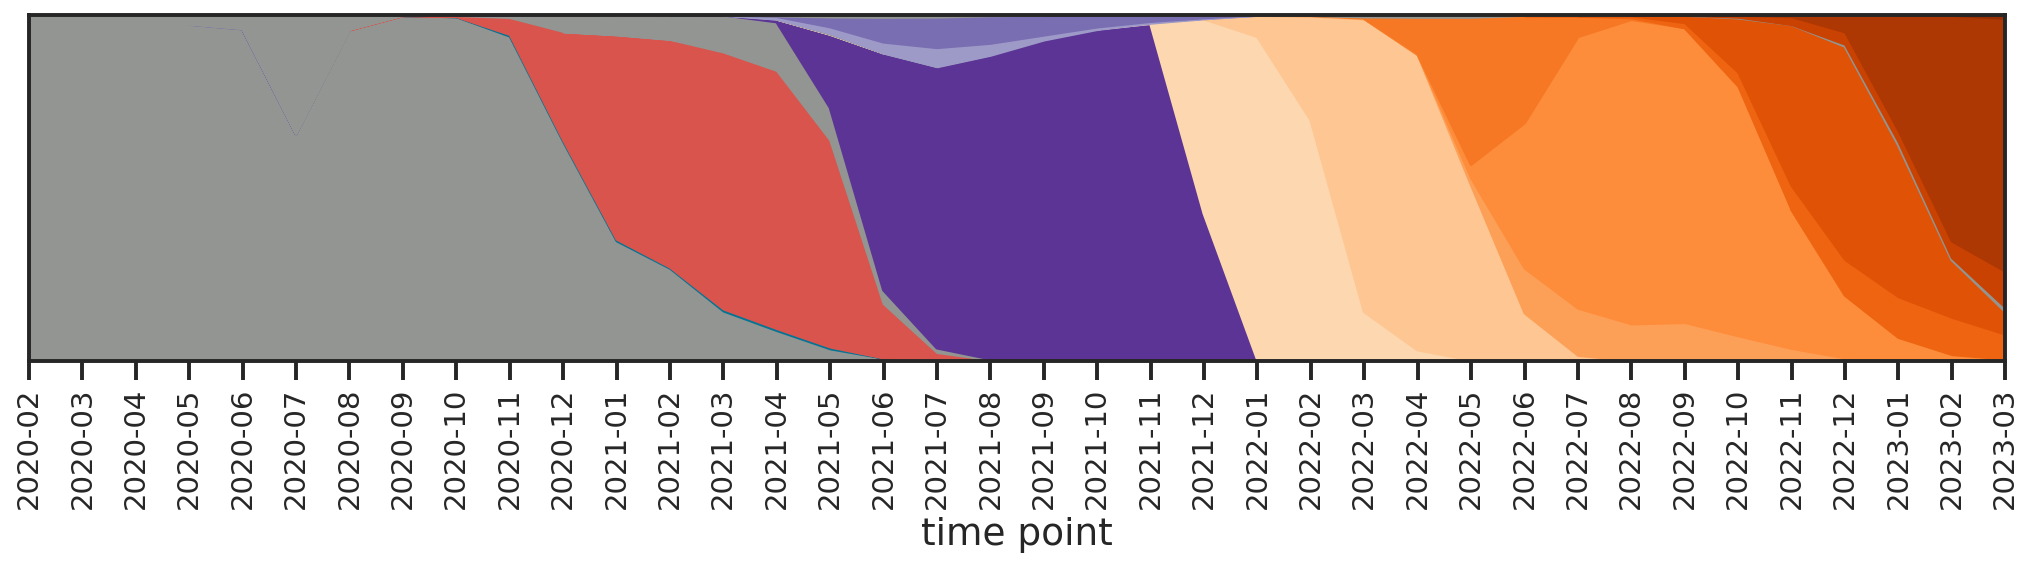

In [49]:
fig, ax = plt.subplots(figsize=(17, 3))

fish_plot(*data, ax=ax)

plt.yticks([])

names = sorted(r['name'].unique())

# plt.axvline(10,
#             color='xkcd:dark grey',
#             ls='dashed')
# plt.axvline(13,
#             color='xkcd:dark grey',
#             ls='dashed')
# plt.axvline(21,
#             color='xkcd:dark grey',
#             ls='dashed')
# plt.axvline(35,
#             color='xkcd:dark grey',
#             ls='dashed')

plt.xlabel('time point')

plt.xticks(range(len(names)),
           names,
           rotation=90,
           fontsize=14)

plt.savefig('update_7.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_7.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

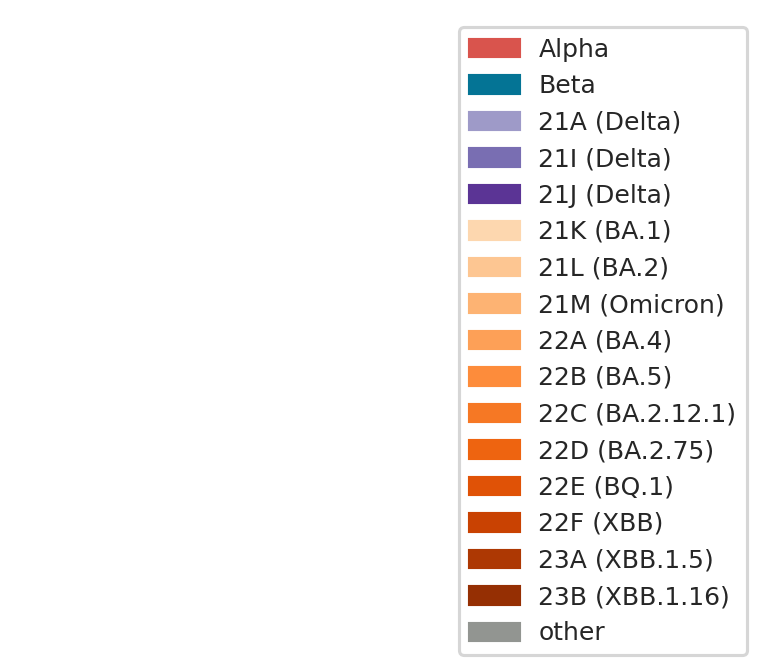

In [50]:
patches = []
for k, v in voc.items():
    if type(v) == str:
        if v != 'xkcd:grey':
            patch = mpatches.Patch(color=v, label=k)
            patches.append(patch)
    else:
        for k1, v1 in voc[k].items():
            patch = mpatches.Patch(color=v1, label=k1)
            patches.append(patch)

patch = mpatches.Patch(color='xkcd:grey', label='other')
patches.append(patch)

plt.legend(handles=patches, facecolor='w', fontsize=12, ncols=1)

plt.xticks([])
plt.yticks([])

sns.despine(left=True, bottom=True)

plt.savefig('update_7_legend.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_7_legend.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);